## Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split

from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
raw_data_train = pd.read_csv("https://raw.githubusercontent.com/srikarthadaka/projects/main/house_price_prediction/train.csv")
raw_data_test = pd.read_csv("https://raw.githubusercontent.com/srikarthadaka/projects/main/house_price_prediction/test.csv")

# raw_data_train = pd.read_csv("D:\\DS Files\\Projects\\house_prices\\train.csv")
# raw_data_test = pd.read_csv("D:\\DS Files\\Projects\\house_prices\\test.csv")

In [3]:
raw_data_train.shape, raw_data_test.shape

((1460, 81), (1459, 80))

In [4]:
pd.options.display.max_columns=100
raw_data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
pd.options.display.max_columns=100
raw_data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00,Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,1329.00,GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.00,Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.00,Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.00,TA,TA,PConc,TA,TA,No,GLQ,602.00,Unf,0.00,324.00,926.00,GasA,Ex,Y,SBrkr,926,678,0,1604,0.00,0.00,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.00,Fin,2.00,470.00,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.00,Gd,TA,PConc,Gd,TA,No,ALQ,263.00,Unf,0.00,1017.00,1280.00,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.00,RFn,2.00,506.00,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
raw_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data_train = raw_data_train.copy()
data_test = raw_data_test.copy()

In [8]:
data_train['train'] = 1
data_test['train'] = 0

In [9]:
df = pd.concat([data_train, data_test], axis=0, sort=False)

In [10]:
pd.options.display.max_columns=100
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
1454,2915,160,RM,21.00,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.00,TA,TA,CBlock,TA,TA,No,Unf,0.00,Unf,0.00,546.00,546.00,GasA,Gd,Y,SBrkr,546,546,0,1092,0.00,0.00,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RM,21.00,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,252.00,Unf,0.00,294.00,546.00,GasA,TA,Y,SBrkr,546,546,0,1092,0.00,0.00,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.00,Unf,1.00,286.00,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
1456,2917,20,RL,160.00,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,CBlock,TA,TA,No,ALQ,1224.00,Unf,0.00,0.00,1224.00,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.00,0.00,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.00,Unf,2.00,576.00,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
1457,2918,85,RL,62.00,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.00,TA,TA,PConc,Gd,TA,Av,GLQ,337.00,Unf,0.00,575.00,912.00,GasA,TA,Y,SBrkr,970,0,0,970,0.00,1.00,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,0
1458,2919,60,RL,74.00,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.00,TA,TA,PConc,Gd,TA,Av,LwQ,758.00,Unf,0.00,238.00,996.00,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.00,0.00,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.00,Fin,3.00,650.00,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,0


In [11]:
df.shape

(2919, 82)

In [12]:
df.isnull().mean()*100

Id               0.00
MSSubClass       0.00
MSZoning         0.14
LotFrontage     16.65
LotArea          0.00
                 ... 
YrSold           0.00
SaleType         0.03
SaleCondition    0.00
SalePrice       49.98
train            0.00
Length: 82, dtype: float64

In [13]:
#Percentage of NAN Values 
null_values = [(c, df[c].isna().mean()*100) for c in df]
null_values = pd.DataFrame(null_values, columns=["column_name", "percentage"])

In [14]:
null_values = null_values[null_values.percentage > 50]
null_values.sort_values("percentage", ascending=False)

,column_name,percentage
72,PoolQC,99.66
74,MiscFeature,96.40
6,Alley,93.22
73,Fence,80.44


## Data Manipulation

In [15]:
#droped columns with null value percentage more than 50% 
df = df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [16]:
object_columns_df = df.select_dtypes(include=['object'])
numerical_columns_df =df.select_dtypes(exclude=['object'])

In [17]:
#Number of null values in each feature
null_counts_objects = object_columns_df.isnull().sum()
null_counts_objects

MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64

In [18]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType',
                'GarageFinish','GarageQual','FireplaceQu','GarageCond']
object_columns_df[columns_None]= object_columns_df[columns_None].fillna('None')

In [19]:
columns_with_lowNA = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']
#fill missing values for each column (using its own most frequent value)
object_columns_df[columns_with_lowNA] = object_columns_df[columns_with_lowNA].fillna(object_columns_df.mode().iloc[0])

In [20]:
# object_columns_df.isnull().sum()

In [21]:
object_columns_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [22]:
for col in object_columns_df.columns.values:
  print(col, end="\n")
  print(object_columns_df[col].value_counts(),end="\n ========================================================================\n")
  # print(object_columns_df[col].unique())

MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Street
Pave    2907
Grvl      12
Name: Street, dtype: int64
LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
Utilities
AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
LandSlope
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blues

<AxesSubplot: xlabel='Heating', ylabel='count'>

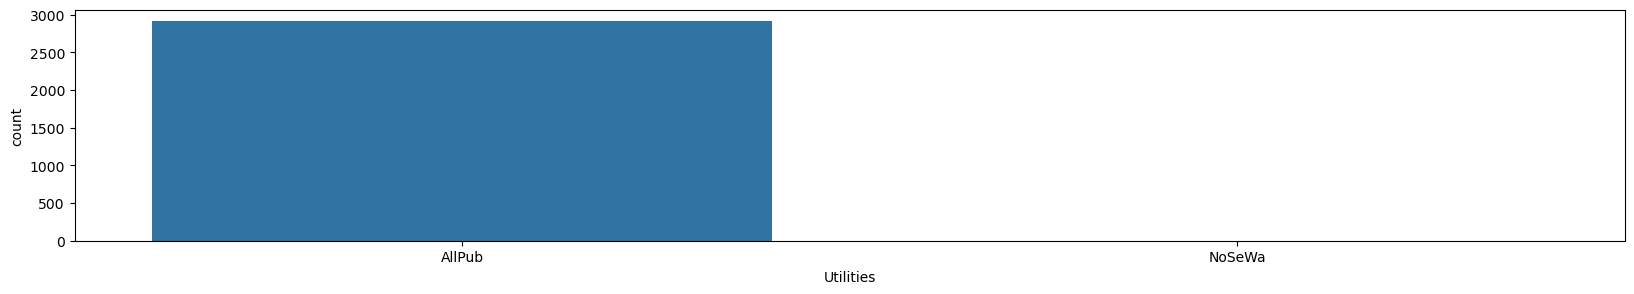

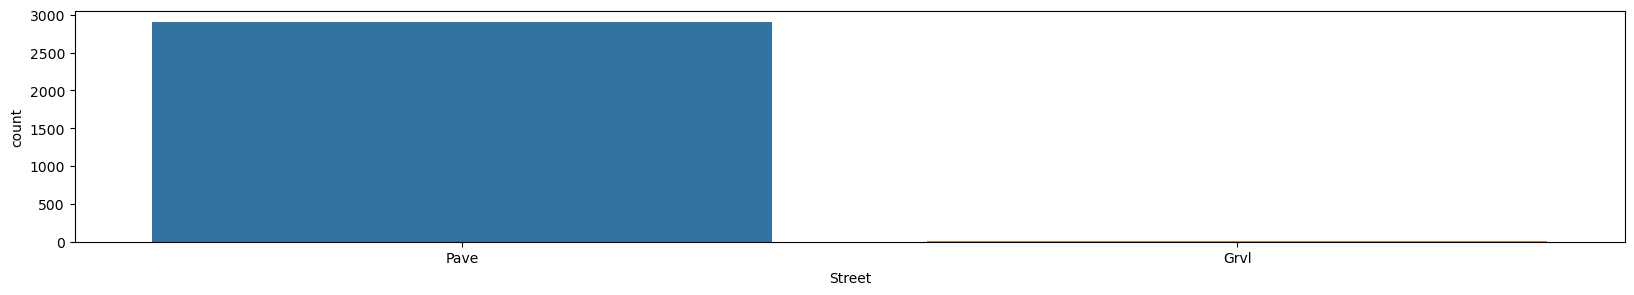

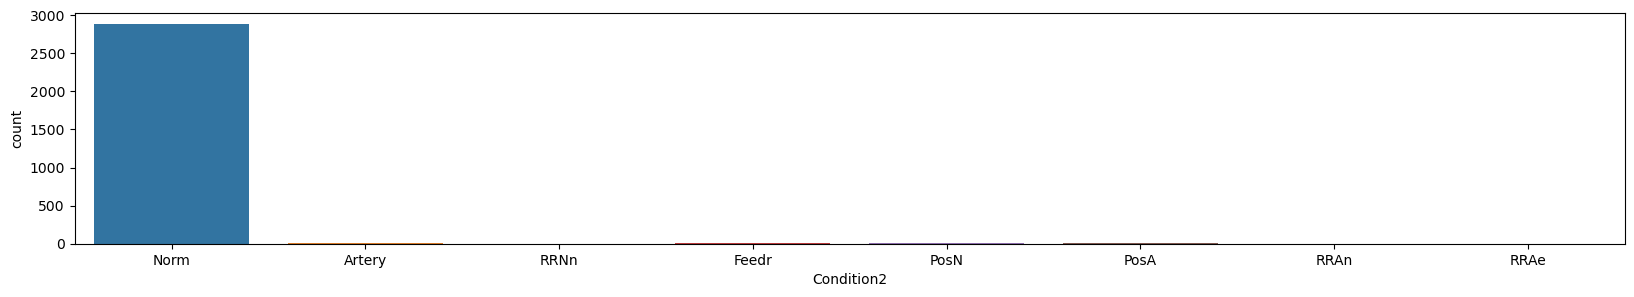

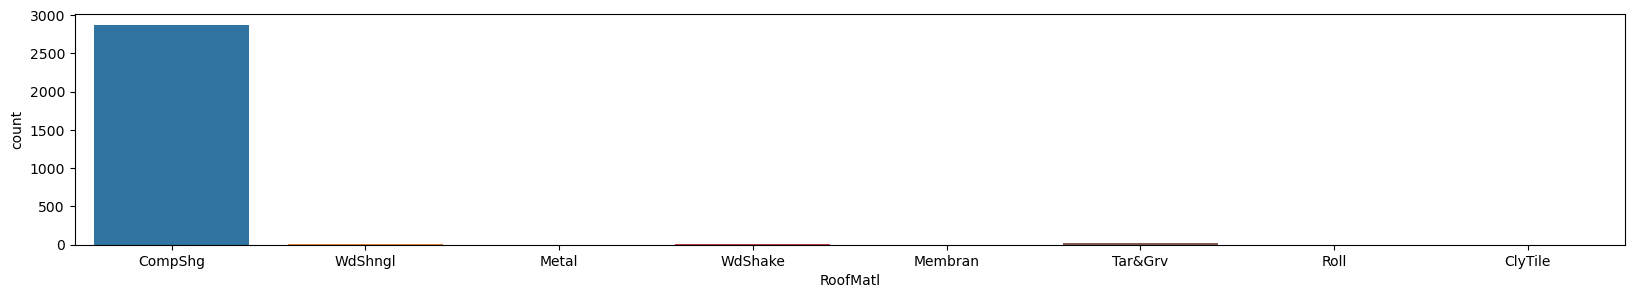

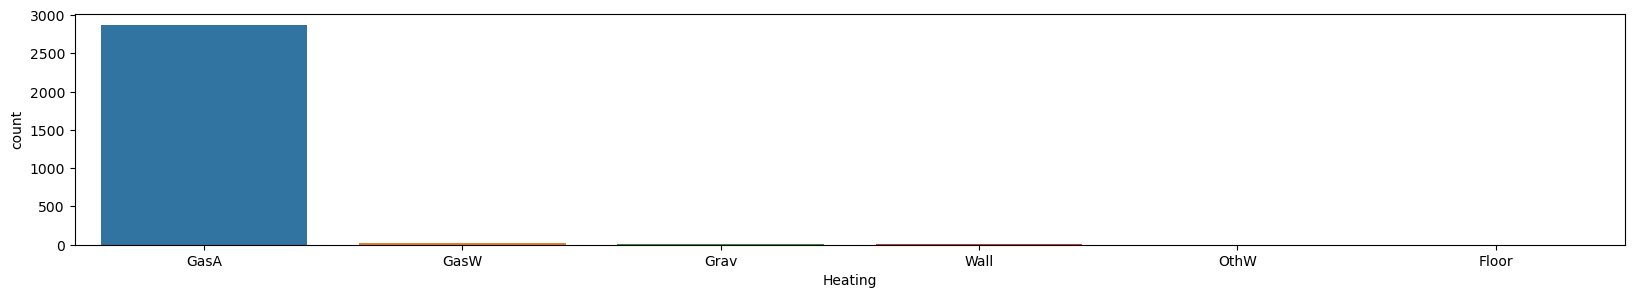

In [23]:
plt.figure(figsize=(20,3))
sns.countplot(data=object_columns_df, x='Utilities') 
plt.figure(figsize=(20,3))
sns.countplot(data=object_columns_df, x='Street') 
plt.figure(figsize=(20,3))
sns.countplot(data=object_columns_df, x='Condition2')
plt.figure(figsize=(20,3))
sns.countplot(data=object_columns_df, x='RoofMatl')
plt.figure(figsize=(20,3))
sns.countplot(data=object_columns_df, x='Heating')

In [24]:
# All these object columns ['Heating','RoofMatl','Condition2','Street','Utilities'] are mostly same values, so we are going to drop
object_columns_df = object_columns_df.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)

In [25]:
object_columns_df.describe(include='object')

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919
unique,5,4,4,5,3,25,9,5,8,6,15,16,4,4,5,6,5,5,5,7,7,5,2,5,4,7,6,7,4,6,6,3,9,6
top,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,Ex,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
freq,2269,1859,2622,2133,2778,443,2511,2425,1471,2310,1026,1015,1766,1798,2538,1308,1283,2606,1904,851,2493,1493,2723,2672,1493,2719,1420,1723,1230,2604,2654,2641,2526,2402


In [26]:
numerical_columns_df.isnull().sum()

Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
train               0
dtype: int64

In [27]:
print((numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt']).median())
print(numerical_columns_df["LotFrontage"].median())

35.0
68.0


In [28]:
numerical_columns_df['GarageYrBlt'] = numerical_columns_df['GarageYrBlt'].fillna(numerical_columns_df['YrSold']-35)
numerical_columns_df['LotFrontage'] = numerical_columns_df['LotFrontage'].fillna(68)

In [29]:
numerical_columns_df= numerical_columns_df.fillna(0)

In [30]:
numerical_columns_df['Age_House']= (numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt'])
numerical_columns_df['Age_House'].describe()

count   2919.00
mean      36.48
std       30.34
min       -1.00
25%        7.00
50%       35.00
75%       54.50
max      136.00
Name: Age_House, dtype: float64

In [31]:
Negatif = numerical_columns_df[numerical_columns_df['Age_House'] < 0]
Negatif

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Age_House
1089,2550,20,128.00,39290,10,5,2008,2009,1224.00,4010.00,0.00,1085.00,5095.00,5095,0,0,5095,1.00,1.00,2,1,2,1,15,2,2008.00,3.00,1154.00,546,484,0,0,0,0,17000,10,2007,0.00,0,-1


In [32]:
numerical_columns_df.loc[numerical_columns_df['YrSold'] < numerical_columns_df['YearBuilt'],'YrSold' ] = 2009
numerical_columns_df['Age_House']= (numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt'])
numerical_columns_df['Age_House'].describe()

count   2919.00
mean      36.48
std       30.34
min        0.00
25%        7.00
50%       35.00
75%       54.50
max      136.00
Name: Age_House, dtype: float64

In [33]:
numerical_columns_df['TotalBsmtBath'] = numerical_columns_df['BsmtFullBath'] + numerical_columns_df['BsmtFullBath']*0.5
numerical_columns_df['TotalBath'] = numerical_columns_df['FullBath'] + numerical_columns_df['HalfBath']*0.5 
numerical_columns_df['TotalSA']=numerical_columns_df['TotalBsmtSF'] + numerical_columns_df['1stFlrSF'] + numerical_columns_df['2ndFlrSF']

In [34]:
numerical_columns_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Age_House,TotalBsmtBath,TotalBath,TotalSA
count,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,1460.00,57.14,69.09,10168.11,6.09,5.56,1971.31,1984.26,101.40,441.27,49.57,560.58,1051.42,1159.58,336.48,4.69,1500.76,0.43,0.06,1.57,0.38,2.86,1.04,6.45,0.60,1977.83,1.77,472.71,93.71,47.49,23.10,2.60,16.06,2.25,50.83,6.21,2007.79,90491.59,0.50,36.48,0.64,1.76,2547.48
std,842.79,42.52,21.32,7887.00,1.41,1.11,30.29,20.89,178.85,455.61,169.18,439.59,441.12,392.36,428.70,46.40,506.05,0.52,0.25,0.55,0.50,0.82,0.21,1.57,0.65,24.90,0.76,215.54,126.53,67.58,64.24,25.19,56.18,35.66,567.40,2.71,1.32,106496.38,0.50,30.34,0.79,0.64,805.12
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1895.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,0.00,0.00,0.00,0.00,0.00,334.00
25%,730.50,20.00,60.00,7478.00,5.00,5.00,1953.50,1965.00,0.00,0.00,0.00,220.00,793.00,876.00,0.00,0.00,1126.00,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.50,1.00,320.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00,0.00,0.00,7.00,0.00,1.00,2000.00
50%,1460.00,50.00,68.00,9453.00,6.00,5.00,1973.00,1993.00,0.00,368.00,0.00,467.00,989.00,1082.00,0.00,0.00,1444.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1977.00,2.00,480.00,0.00,26.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,34900.00,1.00,35.00,0.00,2.00,2448.00
75%,2189.50,70.00,78.00,11570.00,7.00,6.00,2001.00,2004.00,163.50,733.00,0.00,805.00,1302.00,1387.50,704.00,0.00,1743.50,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2001.00,2.00,576.00,168.00,70.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,163000.00,1.00,54.50,1.50,2.50,2991.50
max,2919.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1526.00,2336.00,6110.00,5095.00,2065.00,1064.00,5642.00,3.00,2.00,4.00,2.00,8.00,3.00,15.00,4.00,2207.00,5.00,1488.00,1424.00,742.00,1012.00,508.00,576.00,800.00,17000.00,12.00,2010.00,755000.00,1.00,136.00,4.50,5.00,11752.00


<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

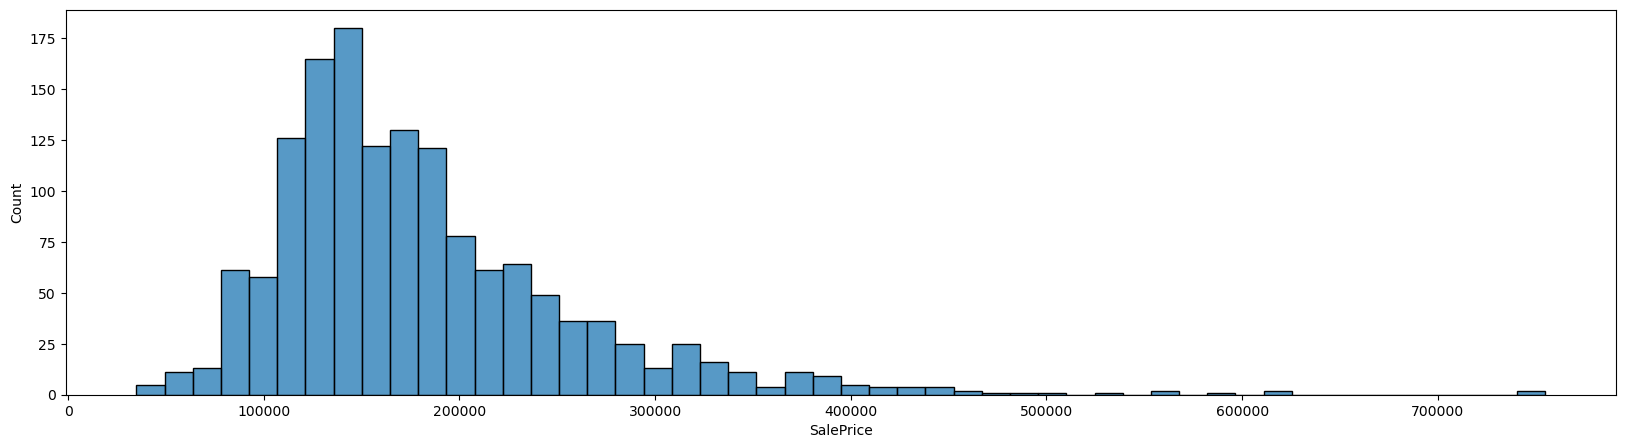

In [35]:
plt.figure(figsize=(20,5))
sns.histplot(data=numerical_columns_df[numerical_columns_df['SalePrice']>0], x="SalePrice", bins=50)

<AxesSubplot: ylabel='Density'>

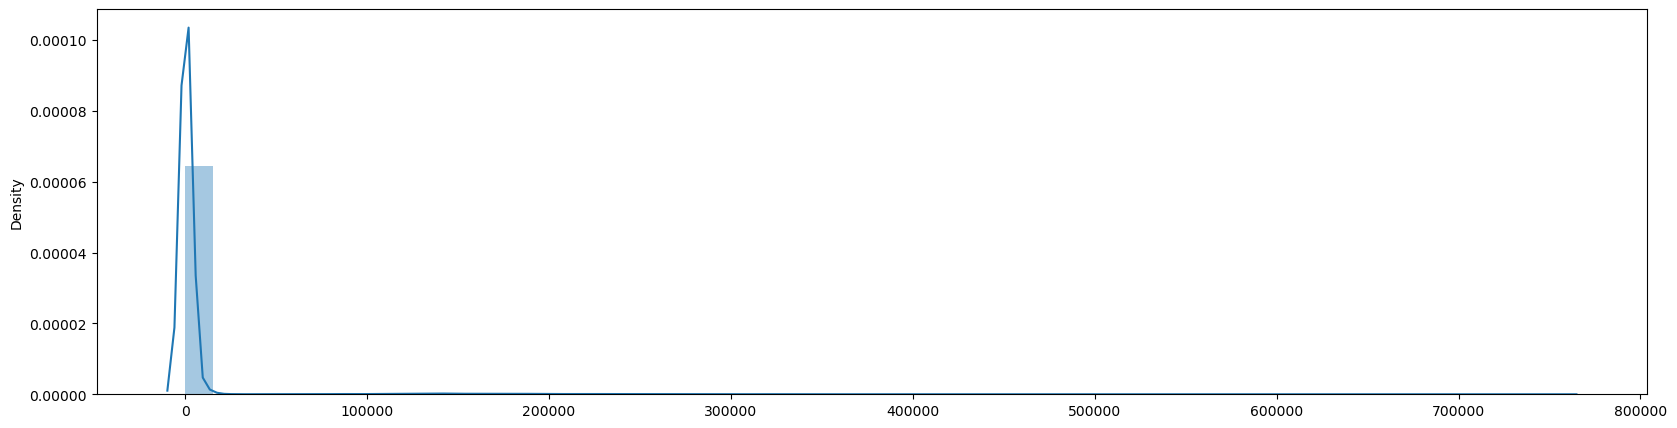

In [36]:
plt.figure(figsize=(20,5))
sns.distplot(numerical_columns_df[numerical_columns_df['SalePrice']>0])

<AxesSubplot: >

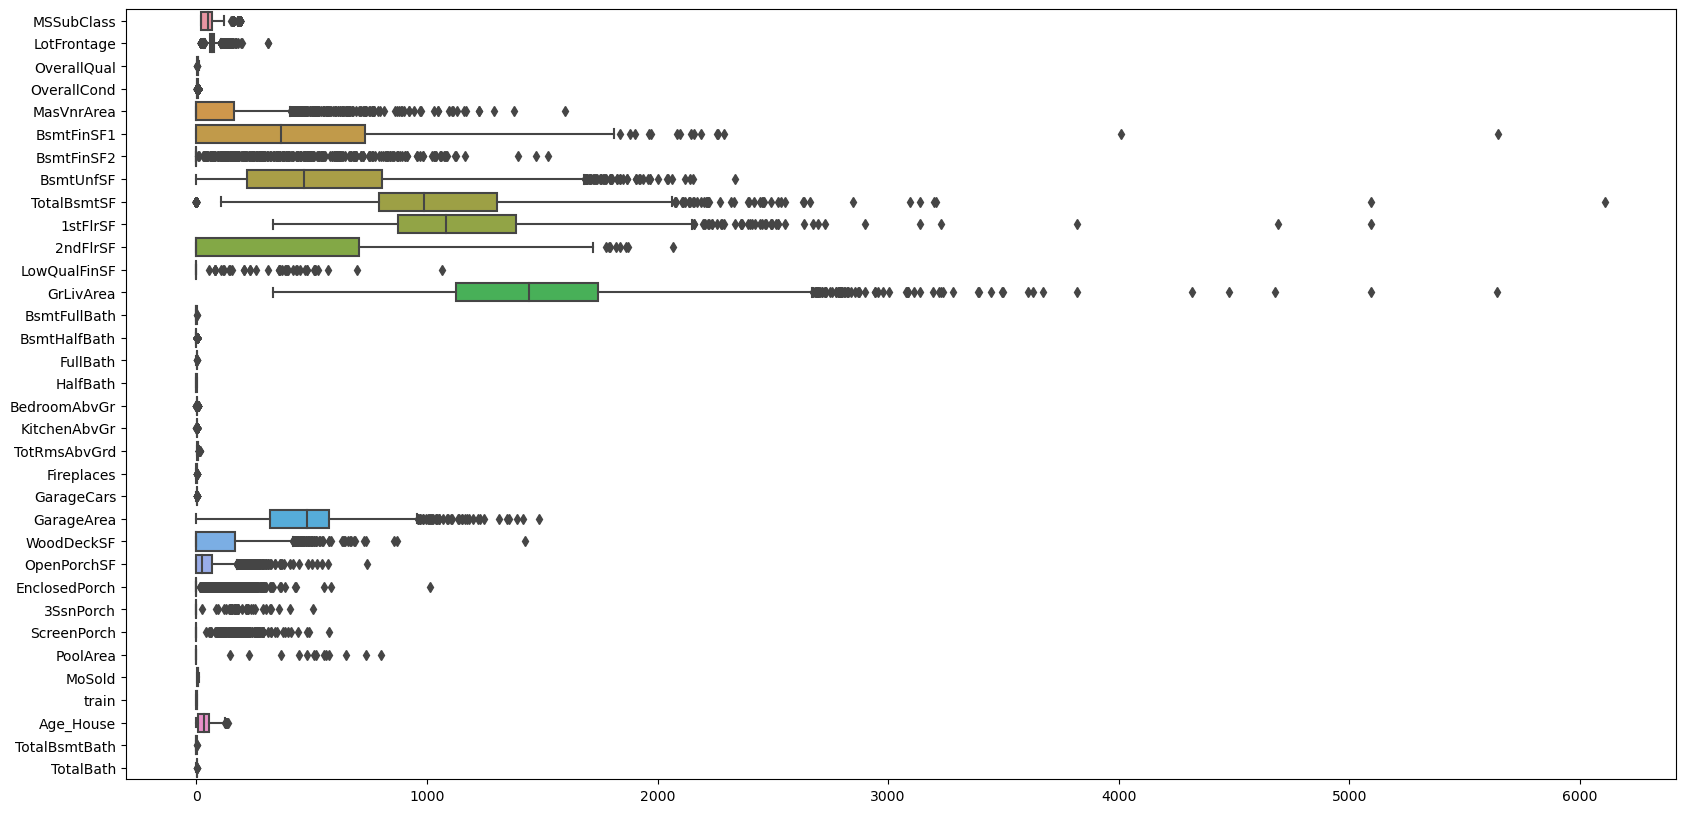

In [37]:
viz_df = numerical_columns_df.drop(['Id','SalePrice','LotArea','MiscVal','TotalSA','YearBuilt',
                                    'YearRemodAdd','GarageYrBlt','YrSold'], axis=1)

plt.figure(figsize=(20,10))
sns.boxplot(data=viz_df, orient="h")

In [38]:
le = LabelEncoder()
for col in object_columns_df:
        le.fit(object_columns_df[col])
        object_columns_df[col] = le.transform(object_columns_df[col])
object_columns_df.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,3,3,4,0,5,2,0,5,1,12,13,1,2,4,2,2,4,3,2,6,0,1,4,2,6,3,1,2,5,5,2,8,4
1,3,3,3,2,0,24,1,0,2,1,8,8,2,3,4,1,2,4,1,0,6,0,1,4,3,6,5,1,2,5,5,2,8,4
2,3,0,3,4,0,5,2,0,5,1,12,13,1,2,4,2,2,4,2,2,6,0,1,4,2,6,5,1,2,5,5,2,8,4
3,3,0,3,0,0,6,2,0,5,1,13,15,2,3,4,0,4,1,3,0,6,2,1,4,2,6,2,5,3,5,5,2,8,0
4,3,0,3,2,0,15,2,0,5,1,12,13,1,2,4,2,2,4,0,2,6,0,1,4,2,6,5,1,2,5,5,2,8,4


In [39]:
df_final = pd.concat([object_columns_df, numerical_columns_df], axis=1,sort=False)
df_final.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Age_House,TotalBsmtBath,TotalBath,TotalSA
0,3,3,3,4,0,5,2,0,5,1,12,13,1,2,4,2,2,4,3,2,6,0,1,4,2,6,3,1,2,5,5,2,8,4,1,60,65.00,8450,7,5,2003,2003,196.00,706.00,0.00,150.00,856.00,856,854,0,1710,1.00,0.00,2,1,3,1,8,0,2003.00,2.00,548.00,0,61,0,0,0,0,0,2,2008,208500.00,1,5,1.50,2.50,2566.00
1,3,3,3,2,0,24,1,0,2,1,8,8,2,3,4,1,2,4,1,0,6,0,1,4,3,6,5,1,2,5,5,2,8,4,2,20,80.00,9600,6,8,1976,1976,0.00,978.00,0.00,284.00,1262.00,1262,0,0,1262,0.00,1.00,2,0,3,1,6,1,1976.00,2.00,460.00,298,0,0,0,0,0,0,5,2007,181500.00,1,31,0.00,2.00,2524.00
2,3,0,3,4,0,5,2,0,5,1,12,13,1,2,4,2,2,4,2,2,6,0,1,4,2,6,5,1,2,5,5,2,8,4,3,60,68.00,11250,7,5,2001,2002,162.00,486.00,0.00,434.00,920.00,920,866,0,1786,1.00,0.00,2,1,3,1,6,1,2001.00,2.00,608.00,0,42,0,0,0,0,0,9,2008,223500.00,1,7,1.50,2.50,2706.00
3,3,0,3,0,0,6,2,0,5,1,13,15,2,3,4,0,4,1,3,0,6,2,1,4,2,6,2,5,3,5,5,2,8,0,4,70,60.00,9550,7,5,1915,1970,0.00,216.00,0.00,540.00,756.00,961,756,0,1717,1.00,0.00,1,0,3,1,7,1,1998.00,3.00,642.00,0,35,272,0,0,0,0,2,2006,140000.00,1,91,1.50,1.00,2473.00
4,3,0,3,2,0,15,2,0,5,1,12,13,1,2,4,2,2,4,0,2,6,0,1,4,2,6,5,1,2,5,5,2,8,4,5,60,84.00,14260,8,5,2000,2000,350.00,655.00,0.00,490.00,1145.00,1145,1053,0,2198,1.00,0.00,2,1,4,1,9,1,2000.00,3.00,836.00,192,84,0,0,0,0,0,12,2008,250000.00,1,8,1.50,2.50,3343.00


## Data Modelling

### Data Preprocessing

In [40]:
df_final = df_final.drop(['Id',],axis=1)

In [41]:
df_train = df_final[df_final['train'] == 1]
df_train = df_train.drop(['train',],axis=1)

In [42]:
df_train.shape

(1460, 75)

In [43]:
df_test = df_final[df_final['train'] == 0]
df_test = df_test.drop(['SalePrice'],axis=1)
df_test = df_test.drop(['train',],axis=1)

In [44]:
df_test.shape

(1459, 74)

In [45]:
X = df_train.drop(['SalePrice'], axis=1)
Y = df_train['SalePrice']

In [46]:
X_train, X_test, Y_train ,Y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

In [47]:
X_train.shape, X_test.shape, Y_train.shape ,Y_test.shape

((1168, 74), (292, 74), (1168,), (292,))

In [48]:
norm = preprocessing.MinMaxScaler()

X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

In [49]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### Lazy Predict

In [50]:
# clf_lazy = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
# models,predictions = clf_lazy.fit(X_train, X_test, Y_train, Y_test)

In [51]:
# models

In [52]:
clf_lazy_norm = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models_norm,predictions_norm = clf_lazy_norm.fit(X_train_norm, X_test_norm, Y_train, Y_test)

100%|██████████| 42/42 [02:14<00:00,  3.19s/it]


In [53]:
models_norm

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.89,0.92,24700.10,0.73
PoissonRegressor,0.87,0.90,26800.66,0.08
RandomForestRegressor,0.87,0.90,26967.41,1.97
BaggingRegressor,0.86,0.90,26993.84,0.30
XGBRegressor,0.86,0.90,27488.34,0.46
LGBMRegressor,0.86,0.89,27824.86,0.29
ExtraTreesRegressor,0.85,0.89,28093.34,2.29
HistGradientBoostingRegressor,0.85,0.89,28234.64,1.67
GammaRegressor,0.84,0.88,29158.09,0.04


In [54]:
clf_lazy_scaled = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models_scaled,predictions_scaled = clf_lazy_scaled.fit(X_train_scaled, X_test_scaled, Y_train, Y_test)

100%|██████████| 42/42 [01:08<00:00,  1.62s/it]


In [55]:
models_scaled

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.89,0.92,24700.10,1.17
PoissonRegressor,0.87,0.90,26800.66,0.04
RandomForestRegressor,0.87,0.90,26967.41,1.94
BaggingRegressor,0.86,0.90,26993.84,0.22
XGBRegressor,0.86,0.90,27488.34,0.49
LGBMRegressor,0.86,0.89,27824.53,0.28
ExtraTreesRegressor,0.85,0.89,28093.34,1.62
HistGradientBoostingRegressor,0.85,0.89,28248.07,2.04
GammaRegressor,0.84,0.88,29158.09,0.04


### Linear Regression

In [56]:
reg_lr = LinearRegression()
reg_lr.fit(X_train, Y_train)
Y_pred_lr = reg_lr.predict(X_test)

In [57]:
# print("MSE : ",mean_squared_error(Y_test,Y_pred_lr))
print("MAE:", round(mean_absolute_error(Y_test,Y_pred_lr),2))
print("RMSE:",round(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)),2))
r2 = r2_score(Y_test,Y_pred_lr)
print("R_Squared:", round(r2*100,2))
r2_adj = (1 - (1 - r2) * (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1))
print("R_Squared_Adj.:", round(r2_adj*100,2))


MAE: 20206.21
RMSE: 31387.94
R_Squared: 86.38
R_Squared_Adj.: 85.65


In [58]:
#We are going to append evaluation scores to results_df
results_df = pd.DataFrame(columns=['Model', 'R_Squared', 'R_Squared_Adj.', 'RMSE', 'MAE'])

In [59]:
model = "Linear Regression"
mae = round(mean_absolute_error(Y_test,Y_pred_lr),2)
rmse = round(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)),2)
r2 = r2_score(Y_test,Y_pred_lr)
r2_adj = (1 - (1 - r2) * (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1))

results_df = results_df.append({'Model': model, 'R_Squared': r2*100,'R_Squared_Adj.': r2_adj*100, 
                                'RMSE': rmse, 'MAE': mae}, ignore_index=True)
results_df


,Model,R_Squared,R_Squared_Adj.,RMSE,MAE
0,Linear Regression,86.38,85.65,31387.94,20206.21


### Support Vector Regression

In [60]:
#SVR needs data to be standardized
sc_X = StandardScaler()

X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

In [61]:
reg_svr = SVR(kernel='rbf')
reg_svr.fit(X_train_sc,Y_train)
Y_pred_svr = reg_svr.predict(X_test_sc)

print("MAE:", round(mean_absolute_error(Y_test,Y_pred_svr),2))
print("RMSE:",round(np.sqrt(mean_squared_error(Y_test,Y_pred_svr)),2))
r2 = r2_score(Y_test,Y_pred_svr)
print("R_Squared:", round(r2*100,2))
adj_r2 = (1 - (1 - r2) * (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1))
print("R_Squared Adj.:", round(adj_r2*100,2))

MAE: 59669.62
RMSE: 87826.82
R_Squared: -6.66
R_Squared Adj.: -12.35


In [64]:
model = SVR()
seed = 7
num_folds = 10
scoring = 'accuracy'
kfold = KFold(n_splits=num_folds, random_state=None)

c_values = [0.1, 0.3, 0.5]
g_values = [0.0001, 0.001, 0.01]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(kernel=kernel_values, C=c_values, gamma=g_values )  #Regularization parameter. The strength of the regularization is inversely proportional to C

grid_svr = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=kfold, verbose=1)

grid_result_svr = grid_svr.fit(X_train_sc, Y_train)
print("Best: %f using %s" %
      (grid_result_svr.best_score_,grid_result_svr.best_params_))

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best: nan using {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}


In [65]:
model = "Support Vector Regressor"

reg_svr = SVR(C= 0.1, gamma=0.0001, kernel= 'linear')
reg_svr.fit(X_train_sc , Y_train)
Y_pred_svr = reg_svr.predict(X_test_sc)

mae = round(mean_absolute_error(Y_test,Y_pred_svr),2)
print("MAE:", mae)
rmse = round(np.sqrt(mean_squared_error(Y_test,Y_pred_svr)),2)
print("RMSE:", rmse)
r2 = r2_score(Y_test,Y_pred_svr)
print("R_Squared:", round(r2*100,2))
adj_r2 = (1 - (1 - r2) * (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1))
print("R_Squared Adj.:", round(adj_r2*100,2))

MAE: 58845.04
RMSE: 86858.29
R_Squared: -4.32
R_Squared Adj.: -9.89


In [66]:
results_df = results_df.append({'Model': model, 'R_Squared': r2*100,'R_Squared_Adj.': r2_adj*100, 
                                'RMSE': rmse, 'MAE': mae}, ignore_index=True)
results_df

,Model,R_Squared,R_Squared_Adj.,RMSE,MAE
0,Linear Regression,86.38,85.65,31387.94,20206.21
1,Support Vector Regressor,-4.32,85.65,86858.29,58845.04


### Decision Tree Regression

In [67]:
reg_dt = DecisionTreeRegressor(random_state = 7) 
reg_dt.fit(X_train, Y_train)
Y_pred_dt = reg_dt.predict(X_test)

print("MAE:", round(mean_absolute_error(Y_test,Y_pred_dt),2))
print("RMSE:",round(np.sqrt(mean_squared_error(Y_test,Y_pred_dt)),2))
r2 = r2_score(Y_test,Y_pred_dt)
print("R_Squared:", round(r2*100,2))
r2_adj = (1 - (1 - r2) * (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1))
print("R_Squared_Adj.:", round(r2_adj*100,2))

MAE: 24913.56
RMSE: 37094.31
R_Squared: 80.97
R_Squared_Adj.: 79.96


In [68]:
param_grid = { 
    # 'max_features': ['sqrt', 'log2', 'auto','None'],
    # "splitter":("best", "random"), 
    "max_depth":(list(range(1, 6))), 
    "min_samples_split":[2, 3, 4, 5, 10], 
    "min_samples_leaf":list(range(1, 6))
}

grid_dt = GridSearchCV(reg_dt, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1, cv=5)
grid_dt.fit(X_train, Y_train)
best_params = grid_dt.best_params_
print(f"Best paramters: {best_params})")
print("MSE: ", -grid_dt.best_score_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
Best paramters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2})
MSE:  1614321153.449092


In [69]:
model = "Decision Tree"

reg_dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=2, splitter='best', max_features='auto', random_state = 7) 
reg_dt.fit(X_train, Y_train)
Y_pred_dt = reg_dt.predict(X_test)

mae = round(mean_absolute_error(Y_test,Y_pred_dt),2)
print("MAE:", mae)
rmse = round(np.sqrt(mean_squared_error(Y_test,Y_pred_dt)),2)
print("RMSE:", rmse)
r2 = r2_score(Y_test,Y_pred_dt)
print("R_Squared:", round(r2*100,2))
r2_adj = (1 - (1 - r2) * (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1))
print("R_Squared_Adj.:", round(r2_adj*100,2))

MAE: 25548.96
RMSE: 36538.43
R_Squared: 81.54
R_Squared_Adj.: 80.55


In [70]:
results_df = results_df.append({'Model': model, 'R_Squared': r2*100,'R_Squared_Adj.': r2_adj*100, 
                                'RMSE': rmse, 'MAE': mae}, ignore_index=True)
results_df

,Model,R_Squared,R_Squared_Adj.,RMSE,MAE
0,Linear Regression,86.38,85.65,31387.94,20206.21
1,Support Vector Regressor,-4.32,85.65,86858.29,58845.04
2,Decision Tree,81.54,80.55,36538.43,25548.96


### Random Forest Regression

In [71]:
# param_grid = {'n_estimators': [50, 100, 200, 300],
#               'max_depth': [None, 10, 20, 30],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4]
# }

# reg_rf = RandomForestRegressor(random_state=7)

# grid_rf = GridSearchCV(reg_rf, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1, cv=5)
# grid_rf.fit(X_train, Y_train)
# best_params = grid_rf.best_params_
# print(f"Best paramters: {best_params})")
# print("MSE: ", -grid_rf.best_score_)

In [72]:
model = "Random Forest"

reg_rf = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300, random_state = 7) 
reg_rf.fit(X_train, Y_train)
Y_pred_rf = reg_rf.predict(X_test)

mae = round(mean_absolute_error(Y_test,Y_pred_rf),2)
print("MAE:", mae)
rmse = round(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)),2)
print("RMSE:", rmse)
r2 = r2_score(Y_test,Y_pred_rf)
print("R_Squared:", round(r2*100,2))
r2_adj = (1 - (1 - r2) * (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1))
print("R_Squared_Adj.:", round(r2_adj*100,2))

MAE: 16965.62
RMSE: 29064.88
R_Squared: 88.32
R_Squared_Adj.: 87.7


In [73]:
results_df = results_df.append({'Model': model, 'R_Squared': r2*100,'R_Squared_Adj.': r2_adj*100, 
                                'RMSE': rmse, 'MAE': mae}, ignore_index=True)
results_df

,Model,R_Squared,R_Squared_Adj.,RMSE,MAE
0,Linear Regression,86.38,85.65,31387.94,20206.21
1,Support Vector Regressor,-4.32,85.65,86858.29,58845.04
2,Decision Tree,81.54,80.55,36538.43,25548.96
3,Random Forest,88.32,87.70,29064.88,16965.62


### XGBoost Regression

In [74]:
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 1],
#     'subsample': [0.5, 0.75, 1],
#     'colsample_bytree': [0.5, 0.75, 1],
# }

# reg_xgb = XGBRegressor()

# grid_xgb = GridSearchCV(reg_xgb, param_grid, cv=5, verbose=1, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_xgb.fit(X_train, Y_train)

# print(f"Best paramters: {grid_xgb.best_params_})")
# print("MSE: ", -grid_xgb.best_score_)

In [75]:
model = "XGBoost Regressor"

reg_xgb = XGBRegressor(colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.5, random_state = 7) 
reg_xgb.fit(X_train, Y_train)
Y_pred_xgb = reg_xgb.predict(X_test)

mae = round(mean_absolute_error(Y_test,Y_pred_xgb),2)
rmse = round(np.sqrt(mean_squared_error(Y_test,Y_pred_xgb)),2)
r2 = r2_score(Y_test,Y_pred_xgb)
r2_adj = (1 - (1 - r2) * (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1))

print("MAE:", mae)
print("RMSE:", rmse)
print("R_Squared:", round(r2*100,2))
print("R_Squared_Adj.:", round(r2_adj*100,2))

MAE: 16491.21
RMSE: 28305.39
R_Squared: 88.92
R_Squared_Adj.: 88.33


In [76]:
results_df = results_df.append({'Model': model, 'R_Squared': r2*100,'R_Squared_Adj.': r2_adj*100, 
                                'RMSE': rmse, 'MAE': mae}, ignore_index=True)
results_df

,Model,R_Squared,R_Squared_Adj.,RMSE,MAE
0,Linear Regression,86.38,85.65,31387.94,20206.21
1,Support Vector Regressor,-4.32,85.65,86858.29,58845.04
2,Decision Tree,81.54,80.55,36538.43,25548.96
3,Random Forest,88.32,87.70,29064.88,16965.62
4,XGBoost Regressor,88.92,88.33,28305.39,16491.21


### Gradient Boosting Reg.

In [77]:
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 1],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2'],
#     'subsample': [0.5, 0.8, 1.0]
# }

# reg_gbr = GradientBoostingRegressor()

# grid_gbr = GridSearchCV(reg_gbr, param_grid, cv=5, verbose=1, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_gbr.fit(X_train, Y_train)

# print(f"Best paramters: {grid_gbr.best_params_})")
# print("MSE: ", -grid_gbr.best_score_)

In [78]:
model = "Gradient Boosting Reg."

reg_gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, n_estimators=100, random_state=7,
                                    max_features='log2', min_samples_leaf= 1, min_samples_split=5, subsample=0.8) 
reg_gbr.fit(X_train, Y_train)
Y_pred_gbr = reg_gbr.predict(X_test)

mae = round(mean_absolute_error(Y_test,Y_pred_gbr),2)
rmse = round(np.sqrt(mean_squared_error(Y_test,Y_pred_gbr)),2)
r2 = r2_score(Y_test,Y_pred_gbr)
r2_adj = (1 - (1 - r2) * (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1))

print("MAE:", mae)
print("RMSE:", rmse)
print("R_Squared:", round(r2*100,2))
print("R_Squared_Adj.:", round(r2_adj*100,2))

MAE: 16396.58
RMSE: 26333.2
R_Squared: 90.41
R_Squared_Adj.: 89.9


In [79]:
results_df = results_df.append({'Model': model, 'R_Squared': r2*100,'R_Squared_Adj.': r2_adj*100, 
                                'RMSE': rmse, 'MAE': mae}, ignore_index=True)
results_df

,Model,R_Squared,R_Squared_Adj.,RMSE,MAE
0,Linear Regression,86.38,85.65,31387.94,20206.21
1,Support Vector Regressor,-4.32,85.65,86858.29,58845.04
2,Decision Tree,81.54,80.55,36538.43,25548.96
3,Random Forest,88.32,87.70,29064.88,16965.62
4,XGBoost Regressor,88.92,88.33,28305.39,16491.21
5,Gradient Boosting Reg.,90.41,89.90,26333.20,16396.58


### Neural Network Regression

In [80]:
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
#     'activation': ['identity', 'logistic', 'tanh', 'relu'],
#     'solver': ['lbfgs', 'sgd', 'adam'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate': ['constant', 'invscaling', 'adaptive']
# }

# reg_nn = MLPRegressor(max_iter=1000, random_state=42)

# grid_nn = GridSearchCV(reg_nn, param_grid, cv=5, verbose=1, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_nn.fit(X_train, Y_train)

# print(f"Best paramters: {grid_nn.best_params_})")
# print("MSE: ", -grid_nn.best_score_)

In [81]:
model = "Neural Network Reg."

# reg_nn = MLPRegressor(activation='relu', alpha=0.01, hidden_layer_sizes=(100,), max_iter=1000, random_state=42) 
reg_nn = MLPRegressor(activation='identity', alpha=0.0001, hidden_layer_sizes=(50,),
                      learning_rate='constant', solver='lbfgs', max_iter=1000, random_state=42) 
reg_nn.fit(X_train, Y_train)
Y_pred_nn = reg_nn.predict(X_test)

mae = round(mean_absolute_error(Y_test,Y_pred_nn),2)
rmse = round(np.sqrt(mean_squared_error(Y_test,Y_pred_nn)),2)
r2 = r2_score(Y_test,Y_pred_nn)
r2_adj = (1 - (1 - r2) * (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1))

print("MAE:", mae)
print("RMSE:", rmse)
print("R_Squared:", round(r2*100,2))
print("R_Squared_Adj.:", round(r2_adj*100,2))

MAE: 26464.53
RMSE: 39935.67
R_Squared: 77.95
R_Squared_Adj.: 76.77


In [82]:
results_df = results_df.append({'Model': model, 'R_Squared': r2*100,'R_Squared_Adj.': r2_adj*100, 
                                'RMSE': rmse, 'MAE': mae}, ignore_index=True)
results_df

,Model,R_Squared,R_Squared_Adj.,RMSE,MAE
0,Linear Regression,86.38,85.65,31387.94,20206.21
1,Support Vector Regressor,-4.32,85.65,86858.29,58845.04
2,Decision Tree,81.54,80.55,36538.43,25548.96
3,Random Forest,88.32,87.70,29064.88,16965.62
4,XGBoost Regressor,88.92,88.33,28305.39,16491.21
5,Gradient Boosting Reg.,90.41,89.90,26333.20,16396.58
6,Neural Network Reg.,77.95,76.77,39935.67,26464.53


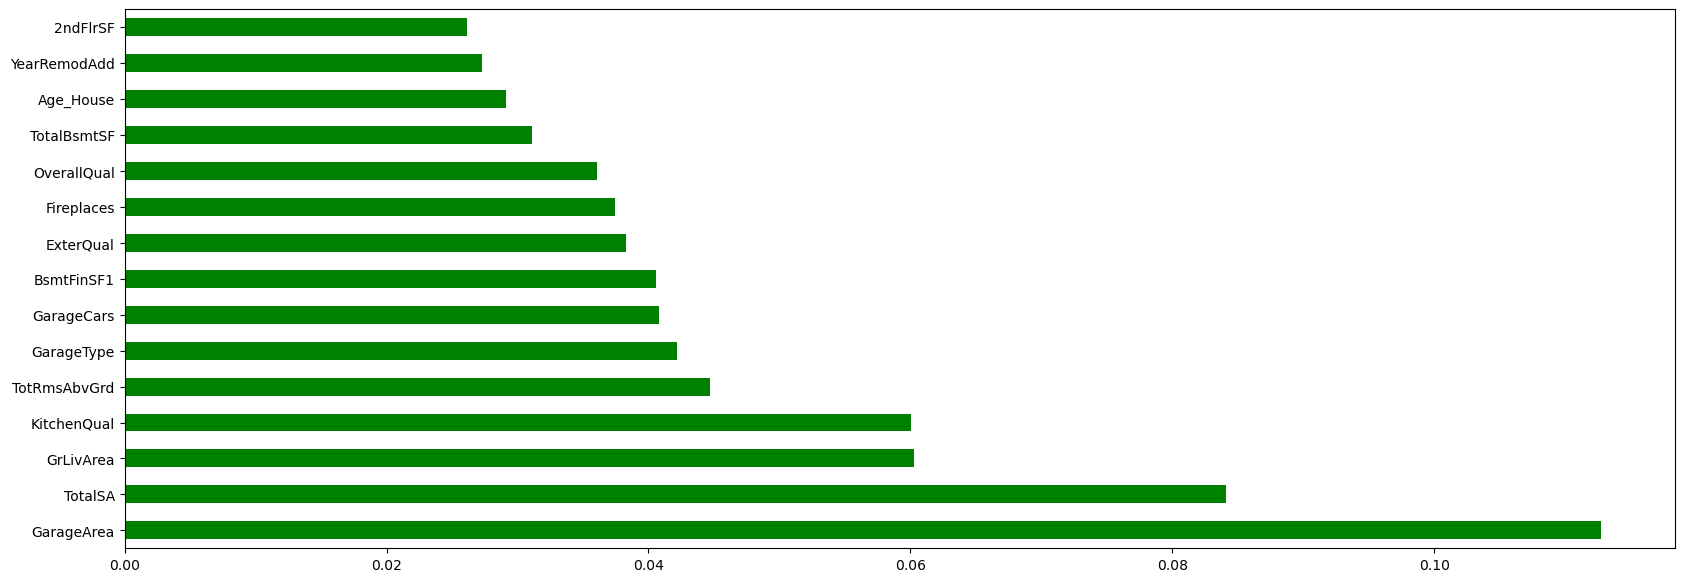

In [83]:
feat_importances = pd.Series(reg_gbr.feature_importances_, index=X.columns)
fig, ax = plt.subplots(figsize=(20, 7))
feat_importances.nlargest(15).plot(kind='barh', color='green' )
plt.show()

In [84]:
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.00
OverallQual     0.79
TotalSA         0.78
GrLivArea       0.71
GarageCars      0.64
                ... 
GarageFinish   -0.43
Age_House      -0.52
KitchenQual    -0.59
BsmtQual       -0.59
ExterQual      -0.64
Name: SalePrice, Length: 75, dtype: float64

## Predictions

In [85]:
df_test.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age_House,TotalBsmtBath,TotalBath,TotalSA
0,2,3,3,4,0,12,1,0,2,1,12,13,2,3,4,1,4,4,3,5,3,4,1,4,3,6,3,1,3,5,5,2,8,4,20,80.00,11622,5,6,1961,1961,0.00,468.00,144.00,270.00,882.00,896,0,0,896,0.00,0.00,1,0,2,1,5,0,1961.00,1.00,730.00,140,0,0,0,120,0,0,6,2010,49,0.00,1.00,1778.00
1,3,0,3,0,0,12,2,0,2,3,13,14,1,3,4,1,4,4,3,0,6,4,1,4,2,6,3,1,3,5,5,2,8,4,20,81.00,14267,6,6,1958,1958,108.00,923.00,0.00,406.00,1329.00,1329,0,0,1329,0.00,0.00,1,1,3,1,6,0,1958.00,1.00,312.00,393,36,0,0,0,0,12500,6,2010,52,0.00,1.50,2658.00
2,3,0,3,4,0,8,2,0,5,1,12,13,2,3,4,2,2,4,3,2,6,2,1,4,3,6,5,1,0,5,5,2,8,4,60,74.00,13830,5,5,1997,1998,0.00,791.00,0.00,137.00,928.00,928,701,0,1629,0.00,0.00,2,1,3,1,6,1,1997.00,2.00,482.00,212,34,0,0,0,0,0,3,2010,13,0.00,2.50,2557.00
3,3,0,3,4,0,8,2,0,5,1,12,13,1,3,4,2,4,4,3,2,6,0,1,4,2,6,2,1,0,5,5,2,8,4,60,78.00,9978,6,6,1998,1998,20.00,602.00,0.00,324.00,926.00,926,678,0,1604,0.00,0.00,2,1,3,1,7,1,1998.00,2.00,470.00,360,36,0,0,0,0,0,6,2010,12,0.00,2.50,2530.00
4,3,0,1,4,0,22,2,4,2,1,6,6,2,2,4,2,2,4,3,0,6,0,1,4,2,6,3,1,2,5,5,2,8,4,120,43.00,5005,8,5,1992,1992,0.00,263.00,0.00,1017.00,1280.00,1280,0,0,1280,0.00,0.00,2,0,2,1,5,0,1992.00,2.00,506.00,0,82,0,0,144,0,0,1,2010,18,0.00,2.00,2560.00


In [86]:
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 1],
#     'max_depth': [3, 4, 5, 6, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2'],
#     'subsample': [0.5, 0.8, 1.0]
# }

# Final_reg_gbr = GradientBoostingRegressor()

# fianl_grid_gbr = GridSearchCV(Final_reg_gbr, param_grid, cv=5, verbose=1, scoring='neg_mean_squared_error', n_jobs=-1)
# fianl_grid_gbr.fit(X, Y)

# print(f"Best paramters: {fianl_grid_gbr.best_params_})")
# print("MSE: ", -fianl_grid_gbr.best_score_)

In [87]:
final_reg_gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=4, n_estimators=150, random_state=7,
                                    max_features='sqrt', min_samples_leaf= 1, min_samples_split=10, subsample=1.0) 
final_reg_gbr.fit(X, Y)
final_pred_gbr = final_reg_gbr.predict(df_test)

In [88]:
final_pred_gbr

array([130012.4301731 , 159706.69395926, 191349.07723139, ...,
       163019.68295252, 127311.5095322 , 221168.51418169])

In [89]:
final_submission = pd.DataFrame()
final_submission['Id'] = data_test['Id']
final_submission['SalePrice'] = final_pred_gbr

In [90]:
final_submission.head()

,Id,SalePrice
0,1461,130012.43
1,1462,159706.69
2,1463,191349.08
3,1464,191821.20
4,1465,189920.27


In [91]:
# final_submission.to_csv("D:\\DS Files\\Projects\\house_prices\\final_submission",index=False)